In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
df = pd.read_csv("StudentsPerformance.csv")
print(df.head())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [3]:
# STEP 3: Data Cleaning
df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]
df.dropna(inplace=True)

In [4]:
df['average_score'] = df[['math_score', 'reading_score', 'writing_score']].mean(axis=1)
df['parental_level_of_education'] = df['parental_level_of_education'].astype('category').cat.codes
df['gender'] = df['gender'].map({'female': 0, 'male': 1})
df['lunch'] = df['lunch'].map({'standard': 1, 'free/reduced': 0})
df['test_preparation_course'] = df['test_preparation_course'].map({'none': 0, 'completed': 1})

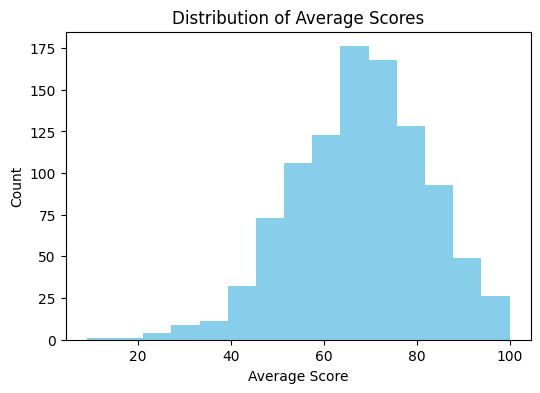

In [5]:
# STEP 5: Exploratory Data Analysis
plt.figure(figsize=(6,4))
plt.hist(df['average_score'], bins=15, color='skyblue')
plt.title("Distribution of Average Scores")
plt.xlabel("Average Score"); plt.ylabel("Count")
plt.show()

In [6]:
# STEP 6: Statistical Analysis (SciPy)
male_scores = df[df['gender']==1]['average_score']
female_scores = df[df['gender']==0]['average_score']
t_stat, p_val = stats.ttest_ind(male_scores, female_scores)
print(f"T-statistic: {t_stat:.2f}, P-value: {p_val:.4f}")
if p_val < 0.05:
    print("Significant difference between male and female scores")

T-statistic: -4.17, P-value: 0.0000
Significant difference between male and female scores


In [7]:
X = df[['gender', 'parental_level_of_education', 'lunch', 'test_preparation_course']]
y = df['average_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# STEP 8: Model Training
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [11]:
y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 11.041421313742237
R2 Score: 0.08949938767891052


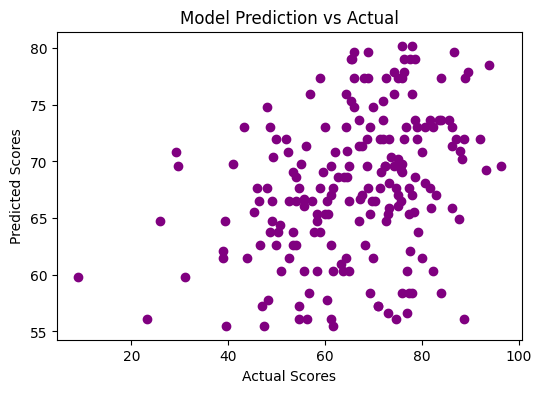

In [14]:
# STEP 10: Visualize Prediction vs Actual
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, color='purple')
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Model Prediction vs Actual")
plt.show()